# ZADANIE 3 (04.11.2024)
Dokonać porównania dwóch dowolonych książek z portalu Project Gutenberg na podstawie bigramów: wykreślić po 20 najpopularniejszych bigramów w obu książkach jak również sieci słów (samoodzielnie wybrać poziom odcięcia). Sprawdzić jak wyglądają otrzymane rysunku w przypadku braku usunięcia słów funkcyjnych. (Czyli finalnie mamy cztery panele dla każdej książki)

In [7]:
import tmtoolkit as tm
corp_80 = tm.corpus.Corpus.from_files('books/Around_80_Days.txt', language="en", load_features=[])
corp_can = tm.corpus.Corpus.from_files('books/Candide.txt', language="en", load_features=[])

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np

def barplot_2gram(corp, title, without_stopwords=True):
    corp = tm.corpus.filter_clean_tokens(corp, remove_stopwords=without_stopwords, remove_shorter_than=2, inplace=False)    
    tm.corpus.to_lowercase(corp)
    corp_bi = tm.corpus.corpus_ngramify(corp, n = 2, inplace=False)
    tok_tab_bi = tm.corpus.tokens_table(corp_bi)
    tok_tab_bi = tok_tab_bi[(~tok_tab_bi['token'].str.contains('gutenberg'))
                            & (~tok_tab_bi['token'].str.contains('electronic'))]
    tok_tab_bi_top = tok_tab_bi["token"].value_counts().reset_index().head(20)

    plt.figure()
    sns.barplot(tok_tab_bi_top, y="token", x="count", orient = 'h')
    if without_stopwords: plt.title(title+f" without stopwords", fontsize=16)
    else: plt.title(title+f" with stopwords", fontsize=16)

def network_2gram(corp, title, without_stopwords=True):
    corp = tm.corpus.filter_clean_tokens(corp, remove_stopwords=without_stopwords, remove_shorter_than=2, inplace=False)
    tm.corpus.to_lowercase(corp)
    corp_bi = tm.corpus.corpus_ngramify(corp, n = 2, inplace=False)
    tok_tab_bi = tm.corpus.tokens_table(corp_bi)
    tok_tab_bi = tok_tab_bi[(~tok_tab_bi['token'].str.contains('gutenberg'))
                            & (~tok_tab_bi['token'].str.contains('electronic'))]
    df_new = tok_tab_bi["token"].str.split(expand = True).add_prefix("token")
    df_new = df_new[["token0", "token1"]].value_counts().reset_index()
    G = nx.from_pandas_edgelist(df_new.head(20), "token0", "token1", edge_attr = "count")

    plt.figure()
    nx.draw_networkx(G, pos=nx.kamada_kawai_layout(G), 
                    node_color="orange", edge_color = "lightgray", font_size = 8, font_color = "blue", node_size = 100, 
                    width = 0.5*np.sqrt(list(nx.get_edge_attributes(G, 'count').values())))
    plt.axis("off")
    if without_stopwords: plt.title(title+f" without stopwords", fontsize=16)
    else: plt.title(title+f" with stopwords", fontsize=16)

### Barplots without stopwords  

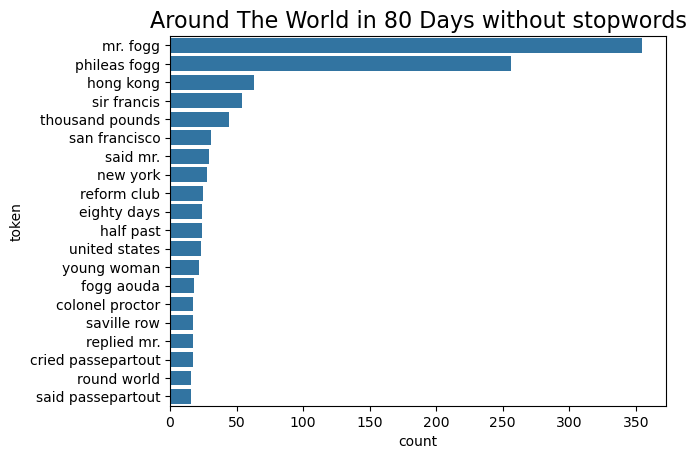

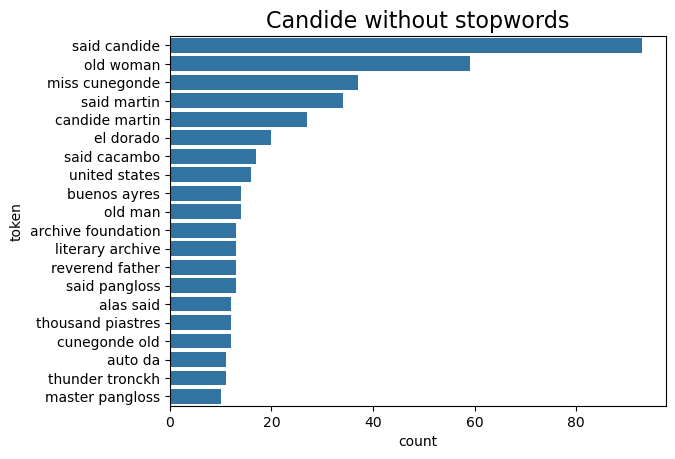

In [9]:
barplot_2gram(corp_80, "Around The World in 80 Days")
barplot_2gram(corp_can, "Candide")

### Barplots with stopwords

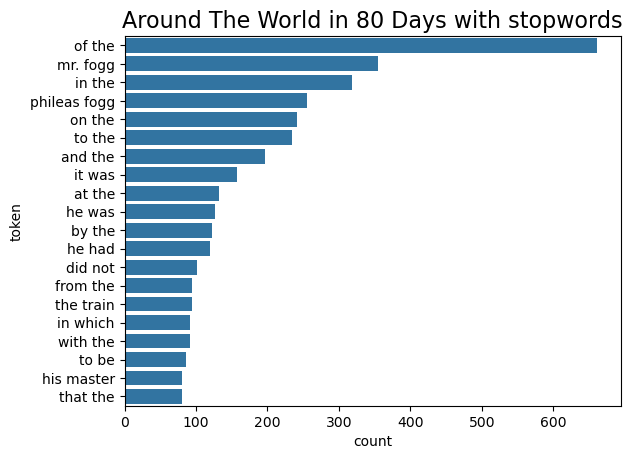

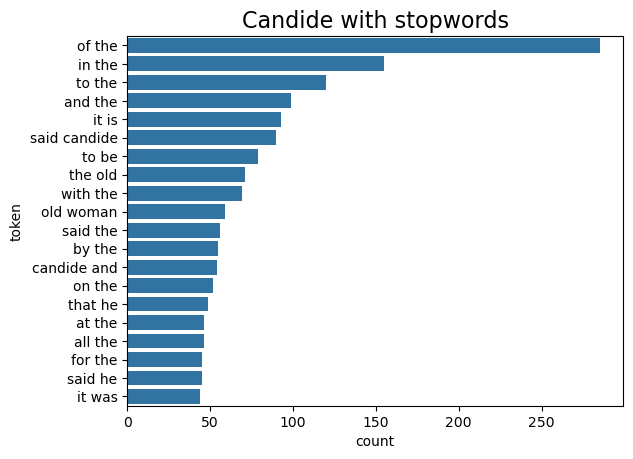

In [10]:
barplot_2gram(corp_80, "Around The World in 80 Days", without_stopwords=False)
barplot_2gram(corp_can, "Candide", without_stopwords=False)

### Graphs without stopwords

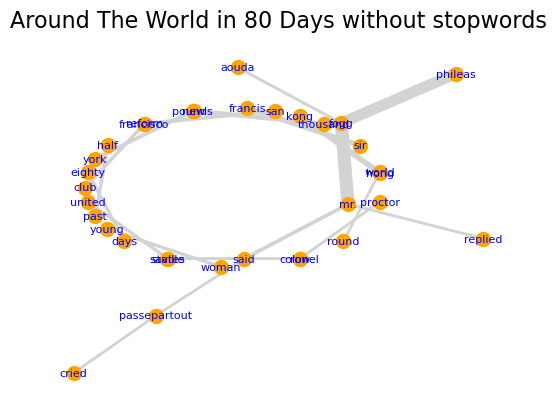

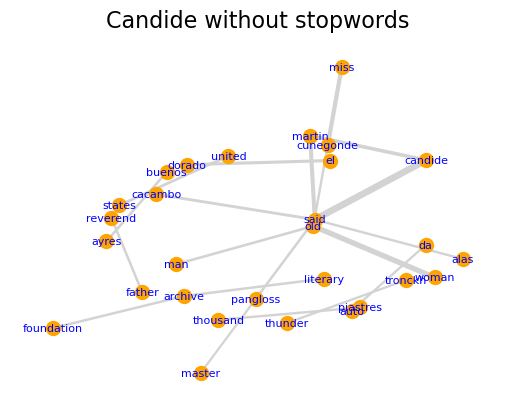

In [11]:
network_2gram(corp_80, title="Around The World in 80 Days")
network_2gram(corp_can, title="Candide")

### Graphs with stopwords

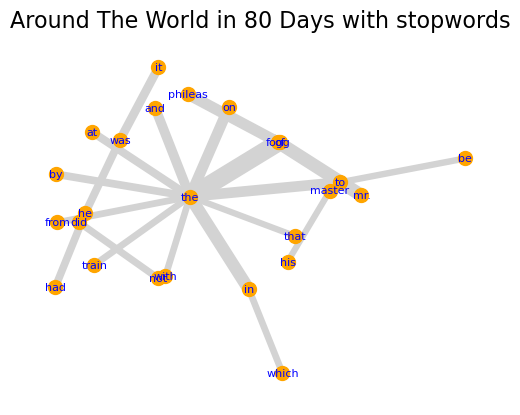

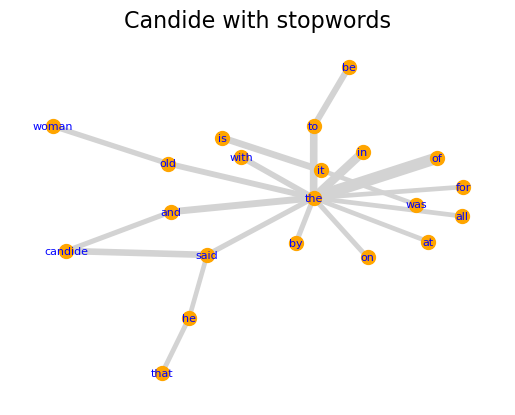

In [12]:
network_2gram(corp_80, title="Around The World in 80 Days", without_stopwords=False)
network_2gram(corp_can, title="Candide", without_stopwords=False)